In [1]:
import mlflow

c:\Users\naman\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("titanic (1).csv")

In [6]:
df.head()

,Sex_male,Embarked_Q,Embarked_S,Embarked_nan,Pclass_2,Pclass_3,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85
2,0.0,0.0,1.0,0.0,0.0,1.0,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,0.0,0.0,1.0,0.0,0.0,0.0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123
4,1.0,0.0,1.0,0.0,0.0,1.0,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN


In [7]:
df=df.drop(columns=['Ticket','Cabin','Name'])

In [8]:
df.head()

,Sex_male,Embarked_Q,Embarked_S,Embarked_nan,Pclass_2,Pclass_3,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,22.0,1,0,7.2500
1,0.0,0.0,0.0,0.0,0.0,0.0,2,1,38.0,1,0,71.2833
2,0.0,0.0,1.0,0.0,0.0,1.0,3,1,26.0,0,0,7.9250
3,0.0,0.0,1.0,0.0,0.0,0.0,4,1,35.0,1,0,53.1000
4,1.0,0.0,1.0,0.0,0.0,1.0,5,0,35.0,0,0,8.0500


In [9]:
columns=['Sex','Embarked']

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_tran,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st=StandardScaler()

In [17]:
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [18]:
x_train

array([[ 0.74405373, -0.29217435,  0.6125977 , ..., -0.48393366,
        -0.48982025, -0.04832485],
       [ 0.74405373,  3.42261387, -1.63239269, ...,  3.23817338,
         0.75065949, -0.07515699],
       [-1.34398895, -0.29217435,  0.6125977 , ..., -0.48393366,
        -0.48982025, -0.49723542],
       ...,
       [ 0.74405373, -0.29217435,  0.6125977 , ...,  0.4465931 ,
        -0.48982025, -0.32933059],
       [ 0.74405373, -0.29217435,  0.6125977 , ..., -0.48393366,
        -0.48982025,  3.68435248],
       [ 0.74405373, -0.29217435,  0.6125977 , ..., -0.48393366,
         1.99113923,  0.95389579]])

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rnd=RandomForestClassifier()

In [21]:
rnd.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
params={'bootstrap': True,
 'ccp_alpha': 0.41,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': 4,
 'max_samples': 3,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 10,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.5,
 'monotonic_cst': None,
 'n_estimators': int(60),
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
rndd=RandomForestClassifier()

In [25]:
param_grid={
    'n_estimators':[10,20,30],
    'min_samples_leaf':[3,4,6,7,20]
}

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
import subprocess
import os
import time
import mlflow
# Step 1: Create directories for backend store and artifacts
os.makedirs("mlruns", exist_ok=True)

# Step 2: Start the MLflow server
command = [
    "mlflow", "server",
    "--backend-store-uri", "sqlite:///mlflow.db",
    "--default-artifact-root", "mlruns",
    "--host", "127.0.0.1",
    "--port", "5000"
]

# Run the MLflow server as a subprocess
process = subprocess.Popen(command)

# Give the server a few seconds to start
time.sleep(5)
mlflow.set_tracking_uri("http://127.0.0.1:5000")


In [34]:
mlflow.set_experiment('hyper')
mlflow.sklearn.autolog()

with mlflow.start_run(run_name='outer',nested=True) as parent:
    grid=GridSearchCV(estimator=rndd,param_grid=param_grid,scoring='accuracy')
    grid.fit(x_train,y_tran)
with mlflow.start_run(run_name='best') as best:
    sigture=mlflow.models.infer_signature(model_input=x_train,model_output=rndd.predict(x_train))
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric('accuracy',grid.best_score_)
    mlflow.sklearn.log_model(sk_model=grid.best_estimator_,artifact_path='best_modellls')

2024/07/20 15:49:20 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


2024/07/20 15:49:20 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
2024/07/20 15:49:49 INFO mlflow.sklearn.utils: Logging the 5 best runs, 10 runs will be omitted.


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [115]:
rndd.fit(x_train,y_tran)

RandomForestClassifier(ccp_alpha=0.41, criterion='entropy', max_depth=20,
                       max_features='log2', max_leaf_nodes=4, max_samples=3,
                       min_impurity_decrease=0.1, min_samples_leaf=10,
                       min_samples_split=6, min_weight_fraction_leaf=0.5,
                       n_estimators=60, oob_score=True)

In [116]:
test=rndd.predict(x_test)

In [117]:
test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [119]:
accuracy=accuracy_score(y_test,test)

In [121]:
precision=precision_score(y_test,test)
recall=recall_score(y_test,test)
f1=f1_score(y_test,test)

c:\Users\naman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [122]:
metrics={
    'accuracy':accuracy,
    'precision':precision,
    'recall':recall,
    'f1':f1
}

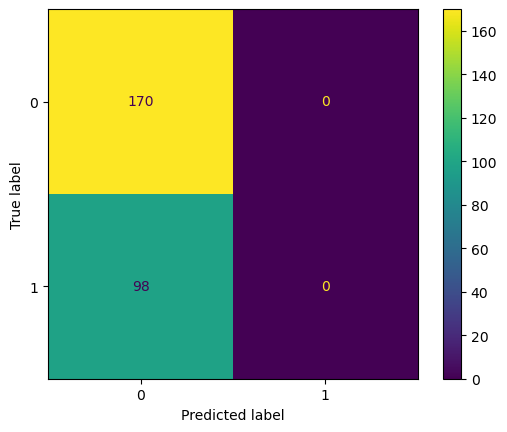

In [128]:
cm=ConfusionMatrixDisplay.from_predictions(y_test,test)

In [66]:
import mlflow

In [74]:
import subprocess
import os
import time

# Step 1: Create directories for backend store and artifacts
os.makedirs("mlruns", exist_ok=True)

# Step 2: Start the MLflow server
command = [
    "mlflow", "server",
    "--backend-store-uri", "sqlite:///mlflow.db",
    "--default-artifact-root", "mlruns",
    "--host", "127.0.0.1",
    "--port", "5000"
]

# Run the MLflow server as a subprocess
process = subprocess.Popen(command)

# Give the server a few seconds to start
time.sleep(5)
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment('kali 3102 bc')


2024/07/20 08:55:45 INFO mlflow.tracking.fluent: Experiment with name 'kali 3102 bc' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/naman/OneDrive/Desktop/mlflow/mlruns/2', creation_time=1721445945960, experiment_id='2', last_update_time=1721445945960, lifecycle_stage='active', name='kali 3102 bc', tags={}>

In [143]:
import pandas as pd
import mlflow

# Load or create a DataFrame
file_path = 'titanic (1).csv'  # Update this path to your actual file location
df = pd.read_csv(file_path)

# Save the DataFrame to a CSV file
dataset_file = 'titanic_dataset.csv'
df.to_csv(dataset_file, index=False)

# Start an MLflow run
with mlflow.start_run():
    # Log dataset as an artifact
    mlflow.log_artifact(dataset_file)
    
    # Print confirmation
    print("Dataset logged to MLflow")


Dataset logged to MLflow


In [141]:
with mlflow.start_run() as run:
    mlflow.log_params(rndd.get_params()) 
    mlflow.log_metrics(metrics=metrics)
    sigture=mlflow.models.infer_signature(model_input=x_train,model_output=rndd.predict(x_train))
    mlflow.sklearn.log_model(rndd,artifact_path='models',signature=sigture)
    mlflow.log_figure(cm.figure_, "confusion_matrix.png")
    dataset=mlflow.data.from_numpy(df_encoded, source="titanic (1).csv")
    mlflow.log_artifact(dataset=dataset)

c:\Users\naman\anaconda3\Lib\site-packages\mlflow\data\dataset_source_registry.py:150: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'titanic (1).csv'. Exception: 
  return _dataset_source_registry.resolve(
c:\Users\naman\anaconda3\Lib\site-packages\mlflow\data\dataset_source_registry.py:150: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(


AttributeError: 'DataFrame' object has no attribute 'flatten'